In [1]:
"""

Dotplot to reveal the relationship.

"""

'\n\nDotplot to reveal the relationship.\n\n'

In [136]:
import os, sys, glob
import numpy as np
import pandas as pd
import pyranges as pr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [3]:
zmat = pd.read_csv('ctcf_rad21_zmat.txt', sep='\t')
zmat.head()

,CTCF_35846_r1,CTCF_36632_r1,CTCF_45230_r1,CTCF_46184_r1,CTCF_50988_r1,RAD21_45689_r1,RAD21_46164_r1,RAD21_91096_r1,RAD21_94415_r1,CTCF_35846_r2,CTCF_36632_r2,CTCF_45230_r2,CTCF_46184_r2,CTCF_50988_r2,RAD21_45689_r2,RAD21_46164_r2,RAD21_91096_r2,RAD21_94415_r2
0,-1.318572,-0.157354,-0.339638,-0.614140,-0.827945,0.130854,-0.933315,0.898413,-0.001785,-1.491006,0.742233,0.434203,-0.125670,-0.444897,1.257339,-0.672018,2.492324,0.970974
1,-1.573287,0.056552,-0.180618,-0.574109,-0.892400,0.500983,-0.899813,1.496707,0.184310,-1.408912,0.571536,0.255217,-0.272493,-0.559289,1.070003,-0.771598,2.217087,0.780124
2,-1.455468,0.150923,-0.168586,-0.730053,-1.001251,0.579184,-1.103368,1.688356,0.388852,-0.980324,0.605919,0.260577,-0.435935,-0.583242,0.935045,-1.027605,2.048915,0.828063
3,-1.323979,0.103611,-0.176518,-0.885393,-0.967052,0.498324,-1.200650,1.512596,0.291995,-0.865260,0.736269,0.382021,-0.524749,-0.624298,0.966360,-0.997551,2.114469,0.959804
4,-1.446131,0.083871,-0.150503,-0.980339,-1.029557,0.409386,-1.089981,1.583741,0.399450,-0.842970,0.651597,0.363544,-0.530841,-0.520532,1.000578,-0.901557,2.091617,0.908629


In [4]:
zmat.shape

(20, 18)

In [5]:
# mean of zscore for each column
# exclude first two rows

zscore_mean = zmat.drop([0,1]).mean(axis=0)
print(zscore_mean)
len(zscore_mean)

CTCF_35846_r1    -1.866253
CTCF_36632_r1    -0.271989
CTCF_45230_r1    -0.451209
CTCF_46184_r1    -0.972928
CTCF_50988_r1    -1.170399
RAD21_45689_r1    0.240721
RAD21_46164_r1   -0.839678
RAD21_91096_r1    1.207393
RAD21_94415_r1   -0.043953
CTCF_35846_r2    -0.799181
CTCF_36632_r2     0.676505
CTCF_45230_r2     0.480833
CTCF_46184_r2    -0.031745
CTCF_50988_r2    -0.213010
RAD21_45689_r2    1.159113
RAD21_46164_r2    0.037142
RAD21_91096_r2    2.147408
RAD21_94415_r2    0.711231
dtype: float64


18

In [11]:
# peak number

## load bed files
bedpath = '../data/bed/ctcf.rad21/'
bedfile = glob.glob(os.path.join(bedpath,'*.bed'))
peaknum = []
for b in bedfile:
    bed = pr.read_bed(b)
    peaknum.append(len(bed))

In [12]:
print(peaknum)
len(peaknum)

[70084, 82900, 87184, 101440, 97256, 92669, 151864, 86582, 51993]


9

In [14]:
#peaknum = np.repeat(peaknum, 2)
peaknum = peaknum + peaknum
peaknum

[70084,
 82900,
 87184,
 101440,
 97256,
 92669,
 151864,
 86582,
 51993,
 70084,
 82900,
 87184,
 101440,
 97256,
 92669,
 151864,
 86582,
 51993]

In [15]:
len(peaknum)
#type(peaknum)

18

In [124]:
min(peaknum)

51993

In [19]:
zscore_mean

Index(['CTCF_35846_r1', 'CTCF_36632_r1', 'CTCF_45230_r1', 'CTCF_46184_r1',
       'CTCF_50988_r1', 'RAD21_45689_r1', 'RAD21_46164_r1', 'RAD21_91096_r1',
       'RAD21_94415_r1', 'CTCF_35846_r2', 'CTCF_36632_r2', 'CTCF_45230_r2',
       'CTCF_46184_r2', 'CTCF_50988_r2', 'RAD21_45689_r2', 'RAD21_46164_r2',
       'RAD21_91096_r2', 'RAD21_94415_r2'],
      dtype='object')

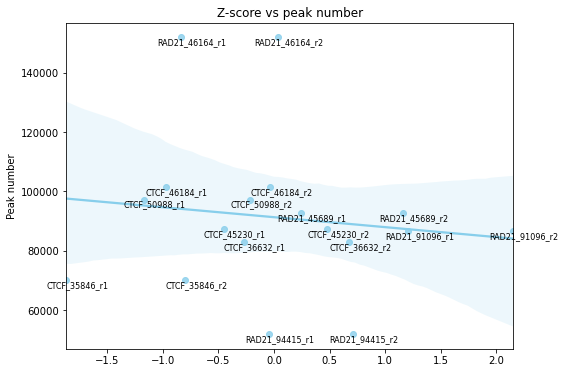

In [74]:
## plot
plt.figure(figsize=(8,6))

plt.title("Z-score vs peak number") #title
plt.xlabel("Z-sore") #x label
plt.ylabel("Peak number") #y label

sns.regplot(x=zscore_mean, y=peaknum, fit_reg=True, marker="o", color="skyblue")
for i in range(0, len(zscore_mean)):
     plt.text(x=zscore_mean[i]+0.1, y=peaknum[i]-2500,
          s=zscore_mean.index[i], horizontalalignment='center',
          fontsize=8, color='black')

plt.savefig('ctcf_rad21_zvsp.pdf')
plt.show()

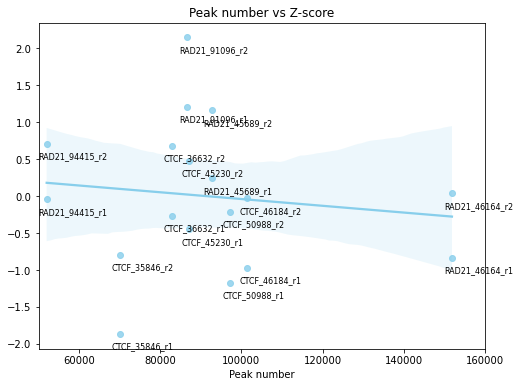

In [135]:
## plot
plt.figure(figsize=(8,6))

plt.title("Peak number vs Z-score") #title
plt.ylabel("Z-sore") #x label
plt.xlabel("Peak number") #y label

plt.xlim((50000, 160000))
#plt.ylim((-2, 2))

sns.regplot(x=peaknum, y=zscore_mean, fit_reg=True, marker="o", color="skyblue")
for i in range(0, len(zscore_mean)):
     plt.text(x=peaknum[i]-2000, y=zscore_mean[i]-0.2,
          s=zscore_mean.index[i], fontsize=8, color='black')

plt.savefig('ctcf_rad21_pknum_zs.pdf')
#plt.margins(0.1)
plt.show()

In [137]:
## test the correlation 
scipy.stats.pearsonr(zscore_mean, peaknum)

(-0.1239421893583109, 0.6241424554907886)

In [138]:
scipy.stats.spearmanr(zscore_mean, peaknum)

SpearmanrResult(correlation=-0.18247995399092784, pvalue=0.4686138430937522)

In [139]:
scipy.stats.kendalltau(zscore_mean, peaknum)

KendalltauResult(correlation=-0.1347420139090739, pvalue=0.4457659079148423)